In [1]:
#importing all important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [50]:
# loading all three datasets
# confirmed dataset(1)

confirmed_cases = pd.read_csv('time_series_covid-19_confirmed.csv')

In [51]:
# display the head of the dataset
# (1)

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,British Columbia,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [4]:
# Extracing all the columns using the .keys() function (it will show all the columns in dataset)


cols = confirmed_cases.keys()
cols




Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20'],
      dtype='object')

In [5]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases
# (1)

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]


In [6]:
# finding the total confirmed cases, death cases and the recovered cases append them to an 4 empty lists

# Also, calculate the total mortality rate which is the death_sum/confirmed cases


dates = confirmed.keys()
world_cases = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    world_cases.append(confirmed_sum)


In [7]:
# let's display each of the newly created variables

confirmed_sum

167449

In [8]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [9]:
# convert all the dates and the case in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)


In [10]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [11]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]], dtype=int64)

In [12]:
#future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [13]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [14]:
adjusted_dates

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [15]:
# convert all the integers into datasets for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [16]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020']

In [17]:
# for visualization with the latest data of 15th of march

latest_confirmed = confirmed_cases[dates[-1]]



In [18]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [19]:
# find the list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [20]:
 # the next line of code will basically calculate the total number of confirmed cases by each country
# data setla irunthu ovouru countryliaum evlo confirme aachunu calculate pandranga
# eg : thailandla mothama evlo confirm apdi ella countrylaium calcualte pandranga
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]= latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()
    


In [21]:
# Number of cases per country/region

print('Confirmed Cases by Countries/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')
               

Confirmed Cases by Countries/Region:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 cas

In [22]:
# find the list of unique provinces

uniq_provinces = list(confirmed_cases['Province/State'].unique())

# those are countries, which are not provices/states

outliers = ['United Kingdom' , 'Denmark' , 'France']
for i in outliers:
    uniq_provinces.remove(i)

In [23]:
# finding the number of confirmed cases per province , state or city

province_confirmed_cases = []
no_cases = []
for i in uniq_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    uniq_provinces.remove(i)
    

In [24]:
# number of cases per province/state/city

for i in range(len(uniq_provinces)):
    print(f'{uniq_provinces[i]}: {province_confirmed_cases[i]}cases')

British Columbia: 428cases
New South Wales: 73cases
Victoria: 134cases
Queensland: 57cases
South Australia: 7798cases
From Diamond Princess: 110cases
Western Australia: 2cases
Tasmania: 1cases
Northern Territory: 32cases
Ontario: 6cases
Alberta: 104cases
Quebec: 39cases
Washington: 50cases
New York: 643cases
California: 732cases
Massachusetts: 426cases
Diamond Princess: 924cases
Grand Princess: 48cases
Georgia: 21cases
Colorado: 99cases
Florida: 131cases
New Jersey: 115cases
Oregon: 98cases
Texas: 36cases
Illinois: 72cases
Pennsylvania: 93cases
Iowa: 66cases
Maryland: 18cases
North Carolina: 32cases
South Carolina: 33cases
Tennessee: 28cases
Virginia: 39cases
Arizona: 45cases
Indiana: 13cases
Kentucky: 20cases
District of Columbia: 20cases
Nevada: 16cases
New Hampshire: 24cases
Minnesota: 13cases
Nebraska: 35cases
Ohio: 17cases
Rhode Island: 37cases
Wisconsin: 20cases
Connecticut: 32cases
Hawaii: 24cases
Oklahoma: 6cases
Utah: 7cases
Kansas: 43cases
Louisiana: 8cases
Missouri: 91cases


In [25]:
# handling nan values if there is any

nan_indices = []


for i in range(len(uniq_provinces)):
    if type(uniq_provinces[i]) == float:
        nan_indices.append(i)
        
uniq_provinces = list(uniq_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    uniq_provinces.pop(i)
    province_confirmed_cases.pop(i)

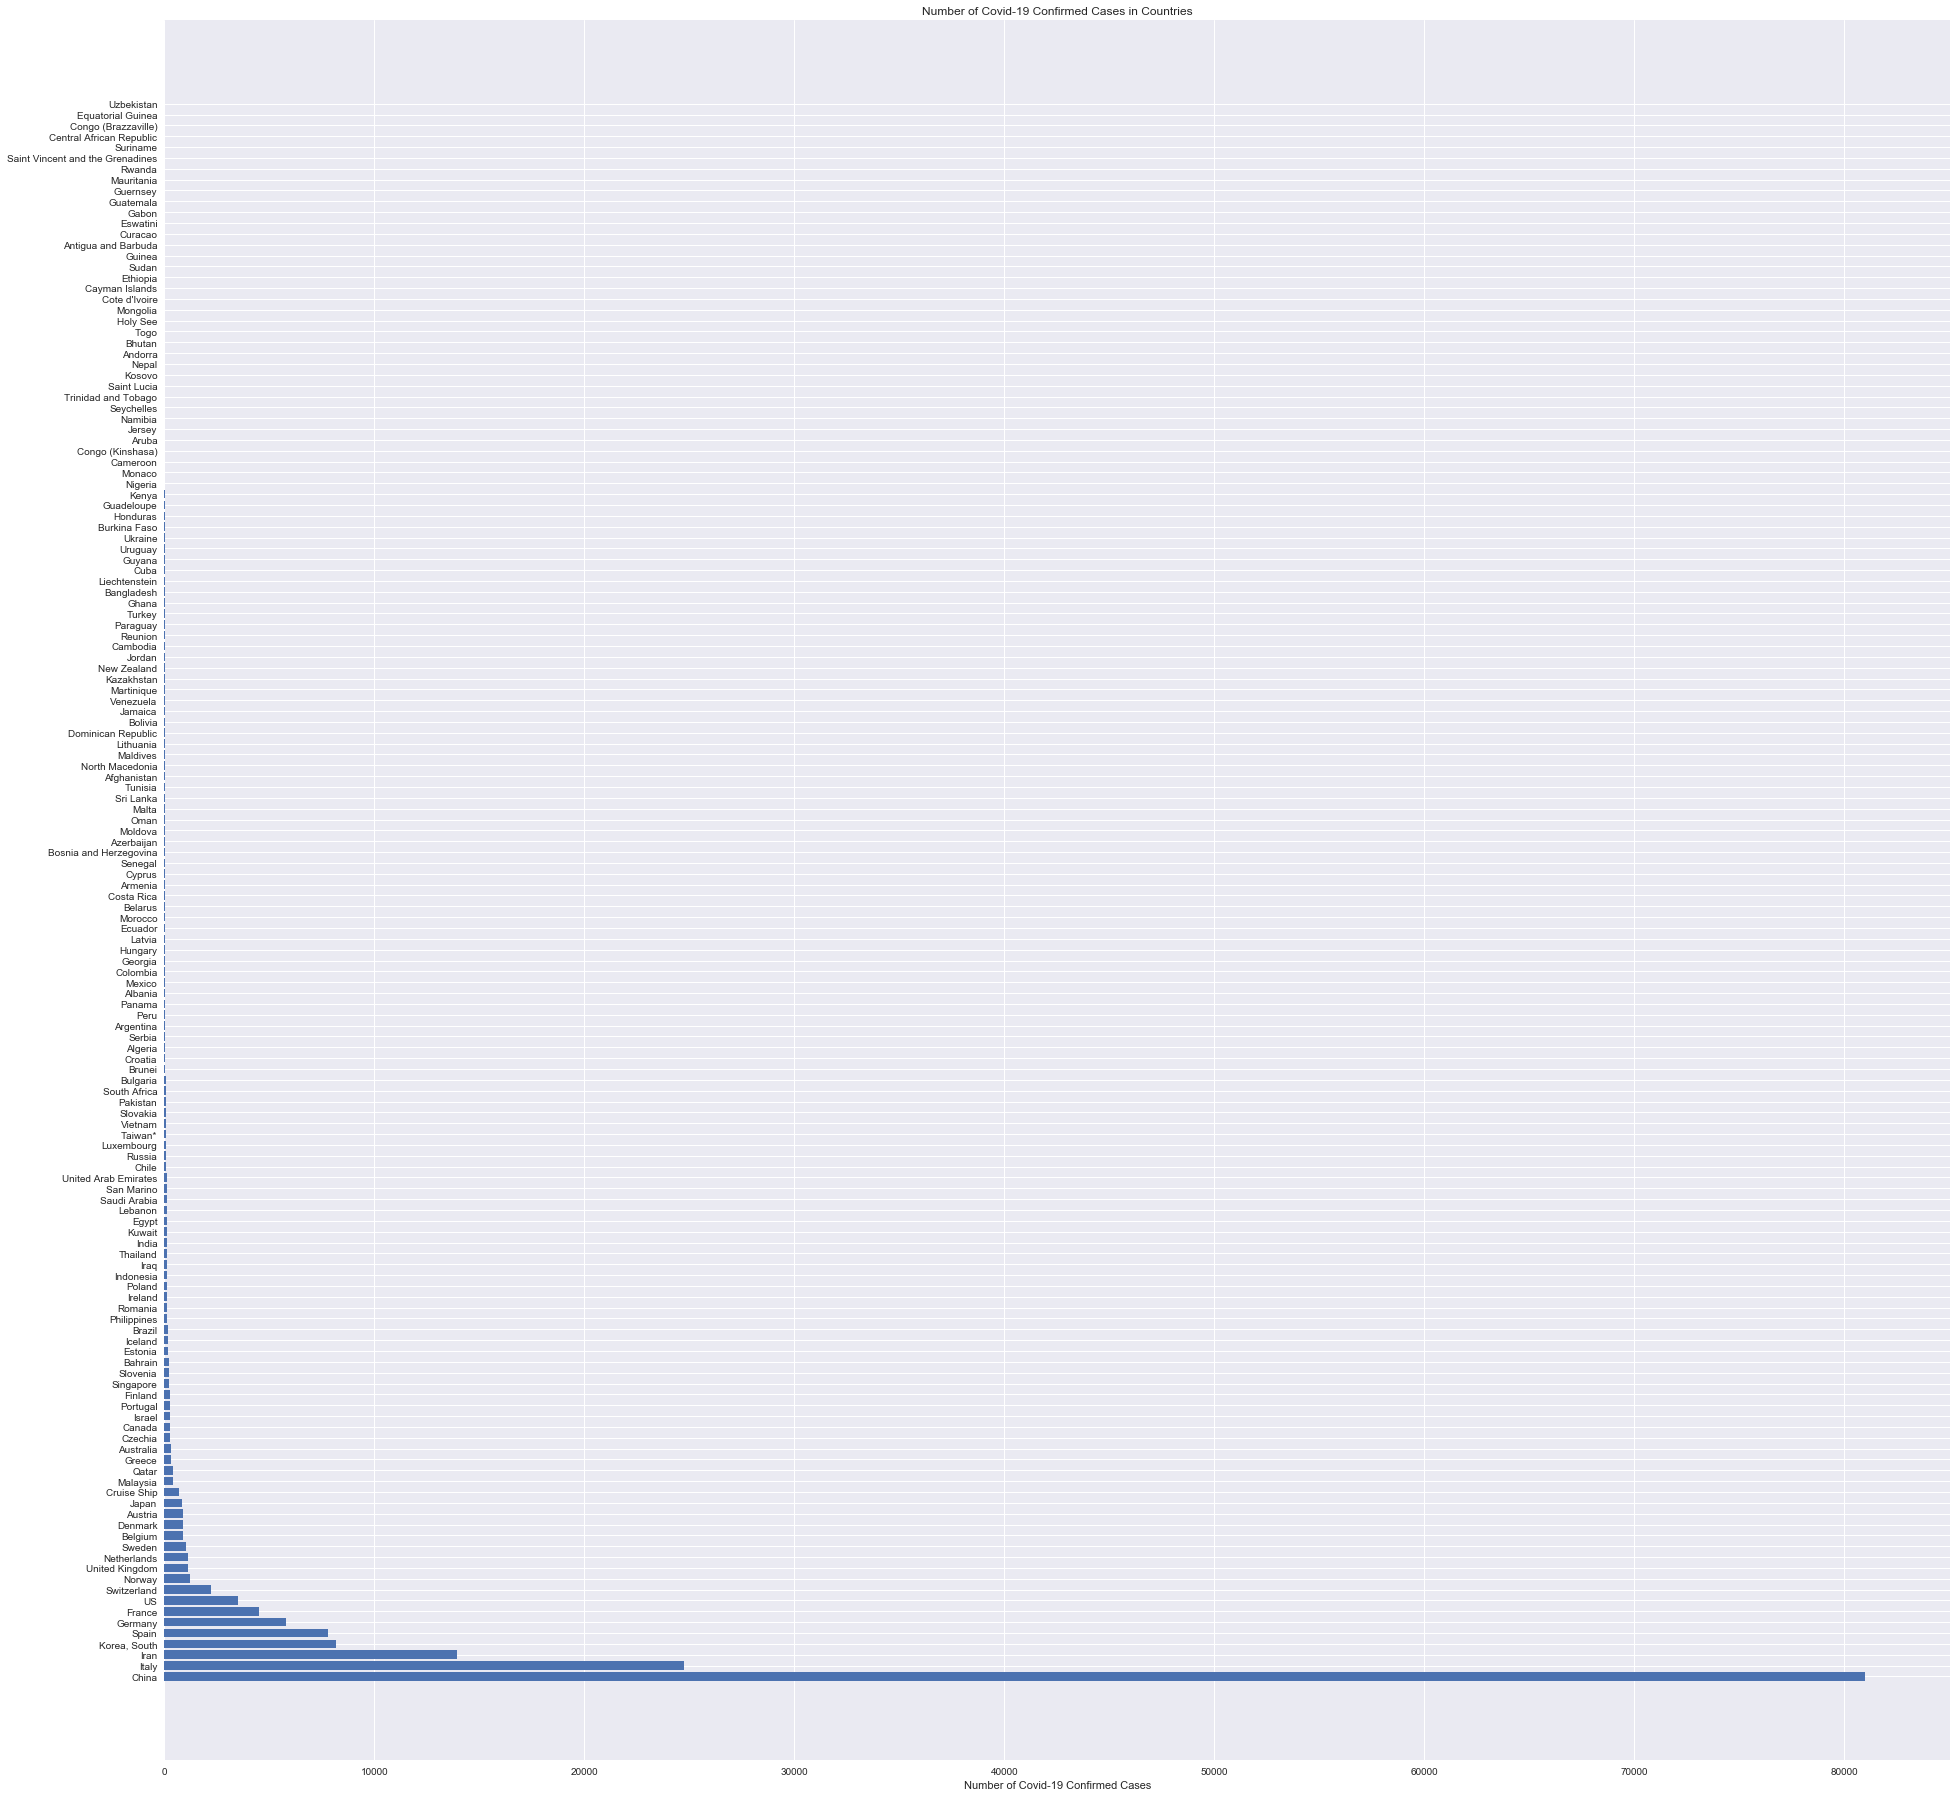

In [26]:
# plot a bar graph to see total confirmed cases across diferent countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

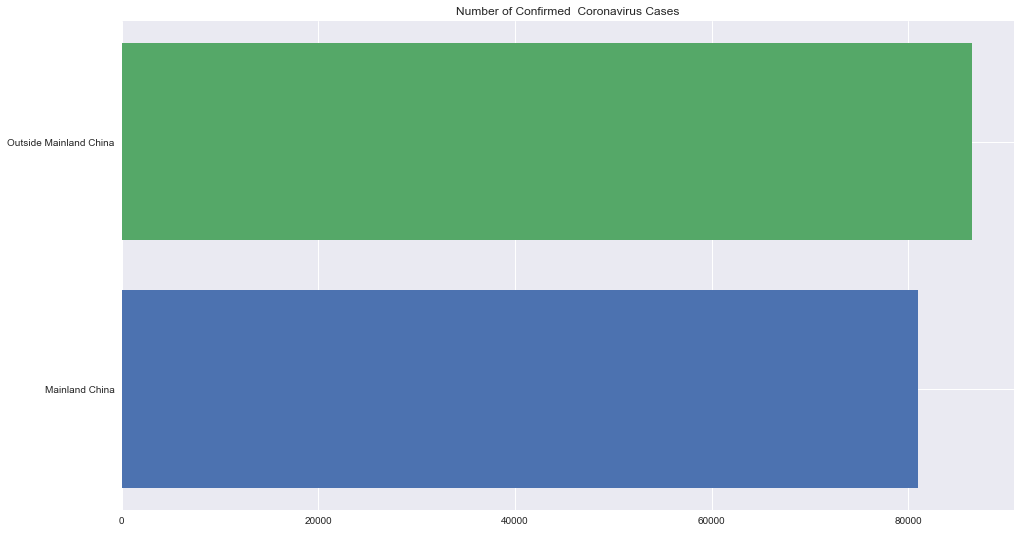

In [27]:
# plot a bar graph to see the total confirmed cases between mainland and china and outside mainland china

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed  Coronavirus Cases')
plt.show()

In [28]:
# Print the total cases in maintained china and outside of it

print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))


Outside Mainland China 86446 cases
Mainland China: 81003 cases
Total: 167449 cases


In [29]:
# only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('others')
visual_confirmed_cases.append(others)

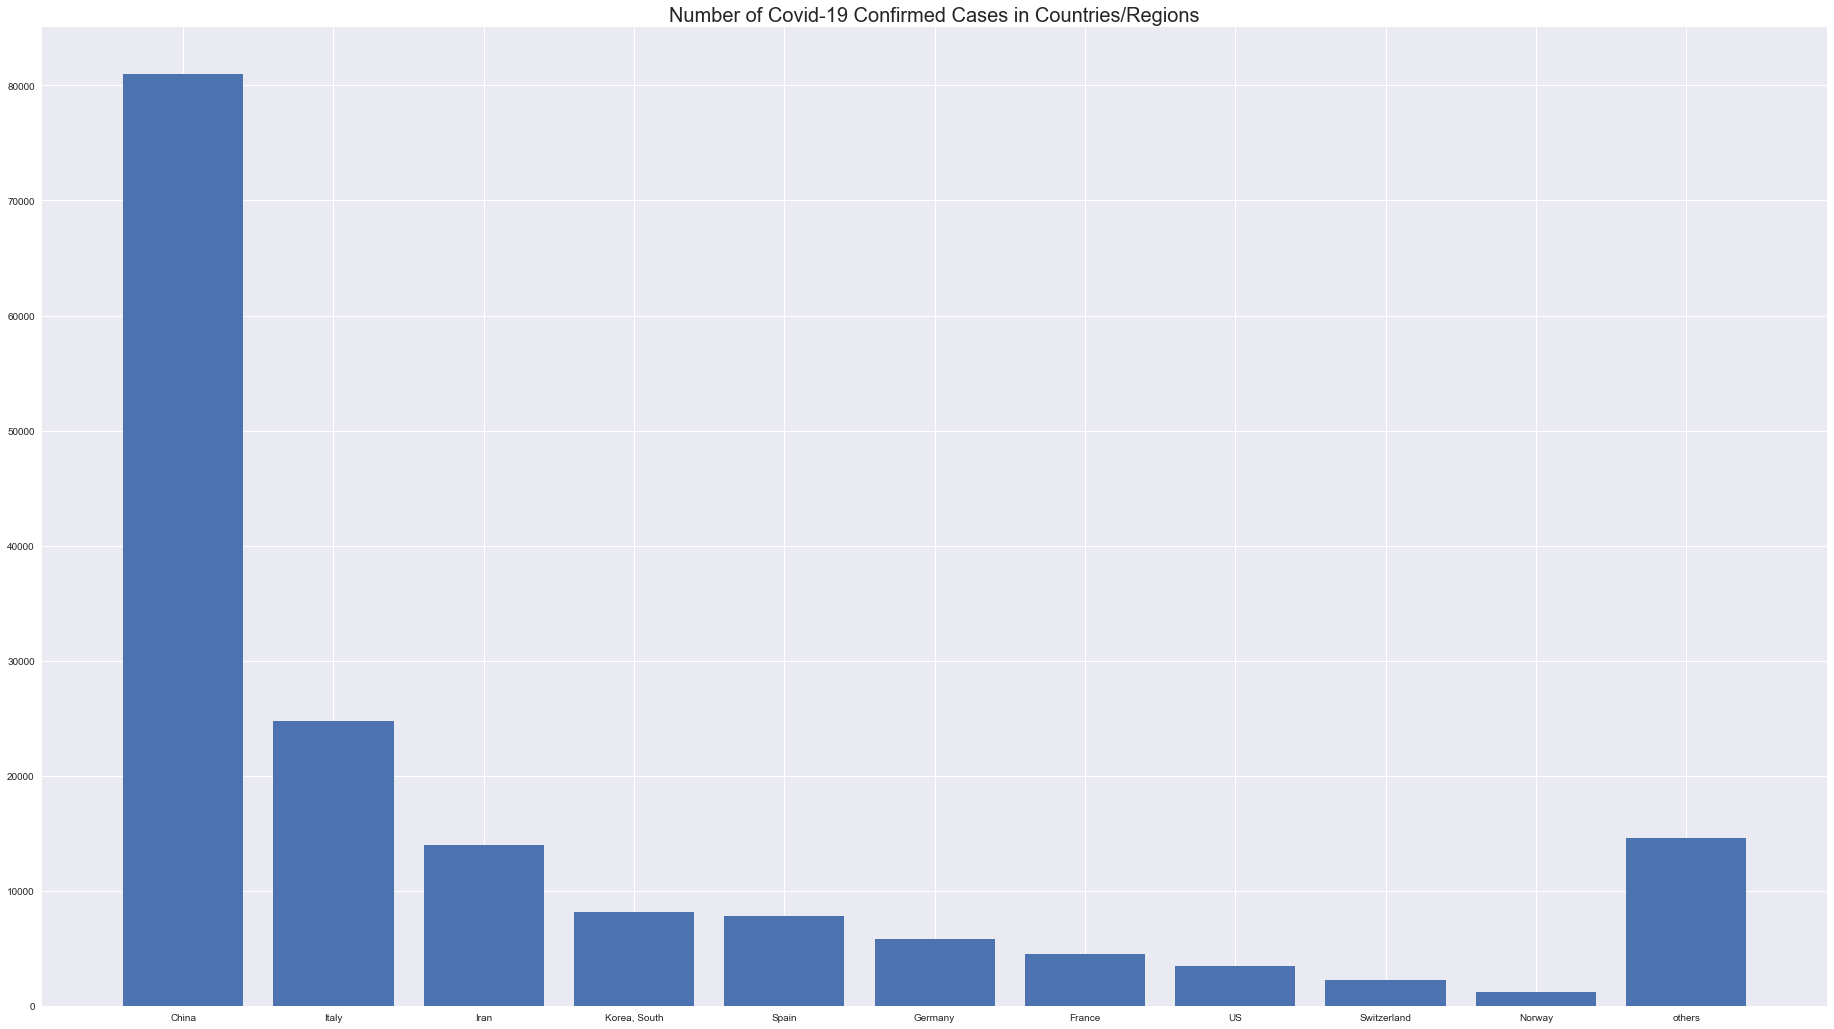

In [30]:
# visualize the 10 countries

plt.figure(figsize=(32,18))
plt.bar(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

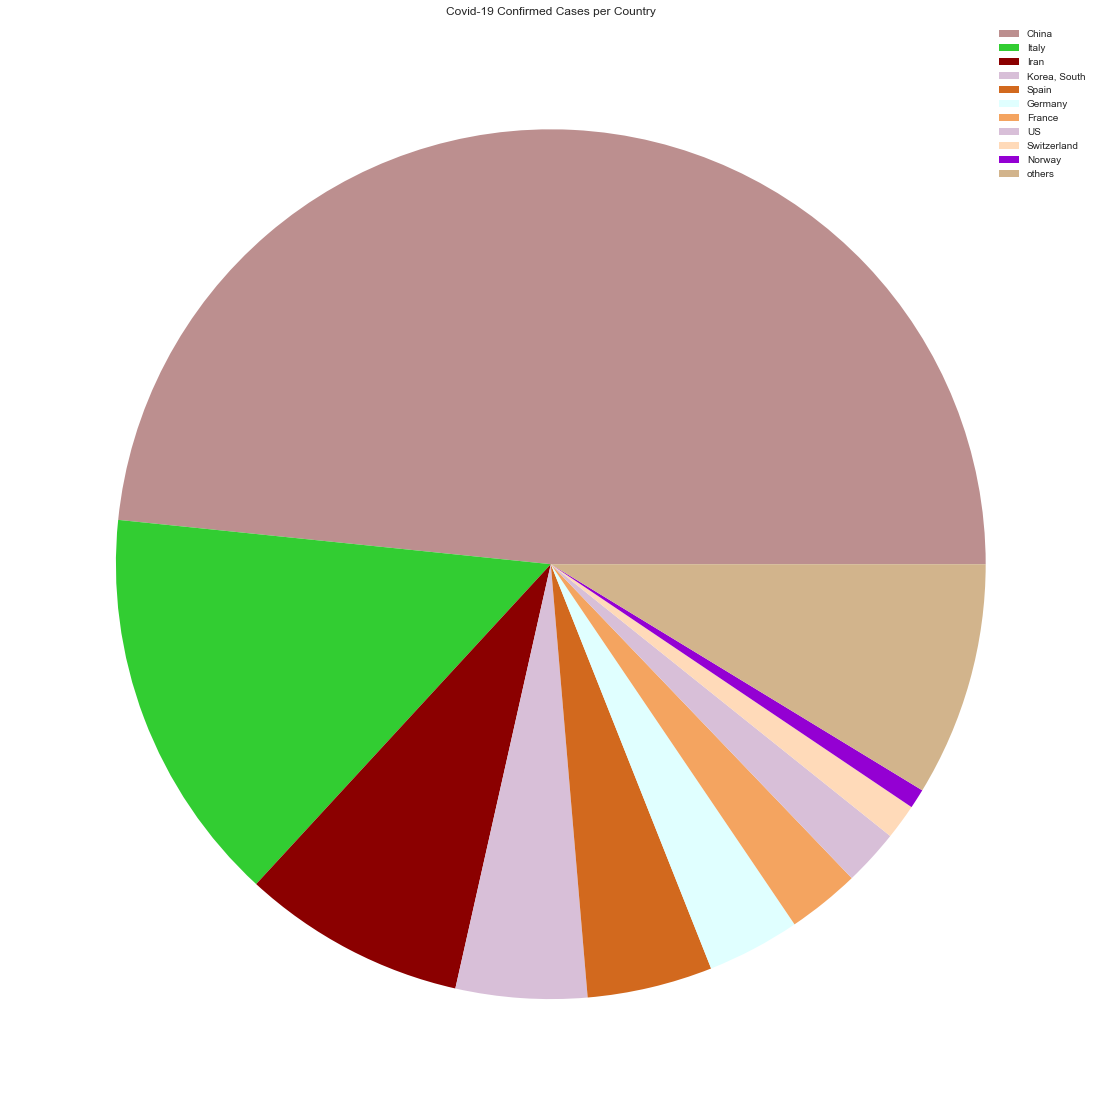

In [31]:
# create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

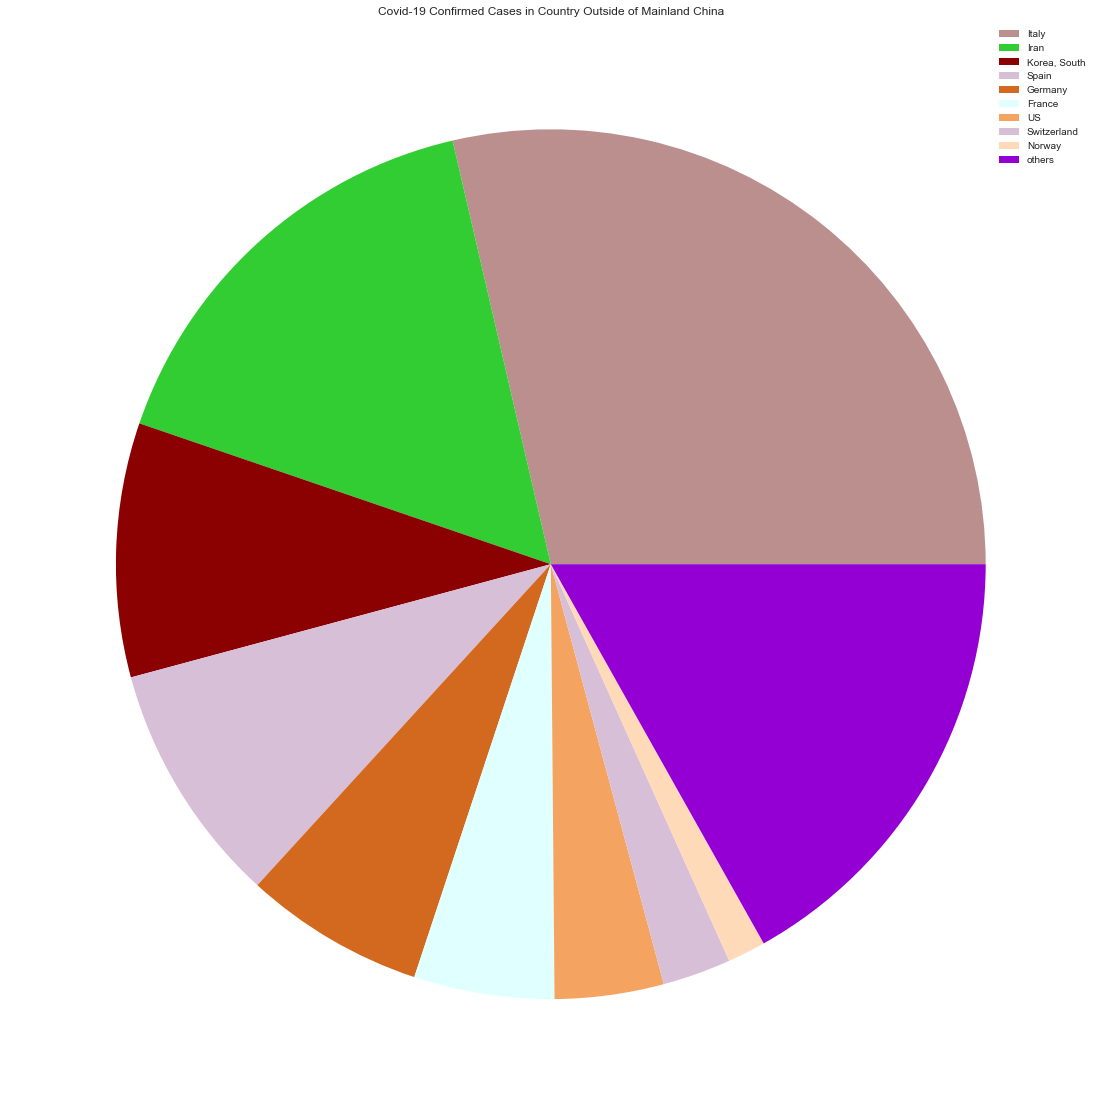

In [32]:
# create a pie chart to see the total confirmed cases in 10 diferent country outside china

p = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases in Country Outside of Mainland China')
plt.pie(visual_confirmed_cases[1:],colors=c)
plt.legend(visual_unique_countries[1:],loc='best')
plt.show()

In [33]:
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days_since_1_22,world_cases,test_size=0.15,shuffle=False)

In [34]:
y_test_confirmed

array([[105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]], dtype=int64)

In [35]:
y_train_confirmed

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784]], dtype=int64)

In [36]:
X_test_confirmed

array([[45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [37]:
X_train_confirmed

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [38]:
# Building the SVM(suport vector machine) Model

kernel = ['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm =SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished
C:\Users\JOTHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [39]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1, 'C': 0.01}

In [40]:
svm_confirmed = svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [41]:
svm_confirmed

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
svm_pred

array([ 30388.34440129,  30389.32185622,  30396.1640407 ,  30414.73568429,
        30450.90151654,  30510.52626702,  30599.47466527,  30723.61144085,
        30888.80132331,  31100.90904222,  31365.79932711,  31689.33690756,
        32077.38651311,  32535.81287332,  33070.48071775,  33687.25477594,
        34391.99977746,  35190.58045185,  36088.86152868,  37092.7077375 ,
        38207.98380786,  39440.55446933,  40796.28445144,  42281.03848376,
        43900.68129585,  45661.07761726,  47568.09217753,  49627.58970624,
        51845.43493293,  54227.49258716,  56779.62739848,  59507.70409644,
        62417.58741062,  65515.14207054,  68806.23280579,  72296.7243459 ,
        75992.48142043,  79899.36875894,  84023.25109098,  88369.99314611,
        92945.45965388,  97755.51534385, 102806.02494557, 108102.8531886 ,
       113651.86480248, 119458.92451679, 125529.89706107, 131870.64716488,
       138487.03955776, 145384.93896929, 152570.210129  , 160048.71776646,
       167826.32661123, 1

MAE:  16263.289241035274
MSE:  284717873.5156596


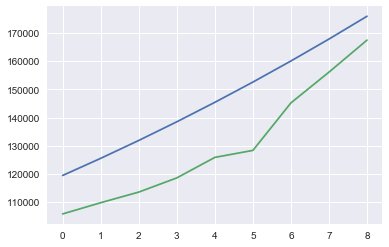

In [43]:
#check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print("MAE: ",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE: ",mean_squared_error(svm_test_pred,y_test_confirmed))

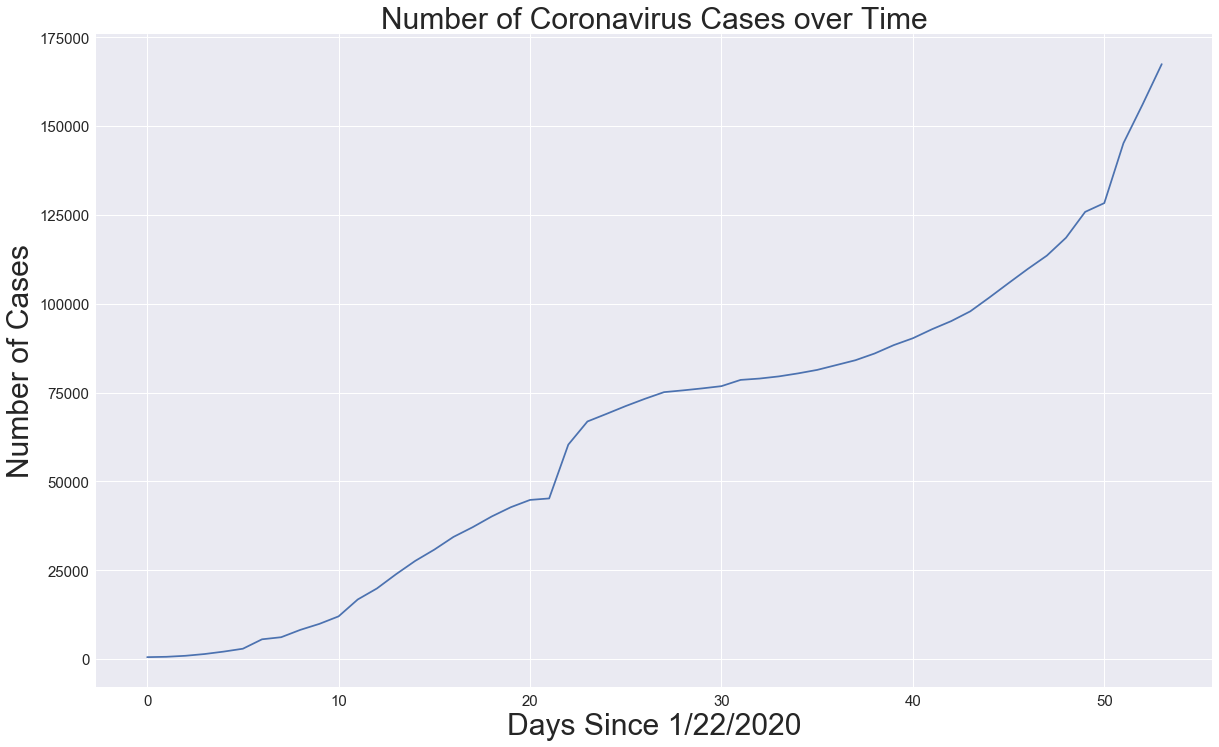

In [44]:
# Total Number of coronavirus cases over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title("Number of Coronavirus Cases over Time",size=30)
plt.xlabel("Days Since 1/22/2020", size=30)
plt.ylabel("Number of Cases", size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

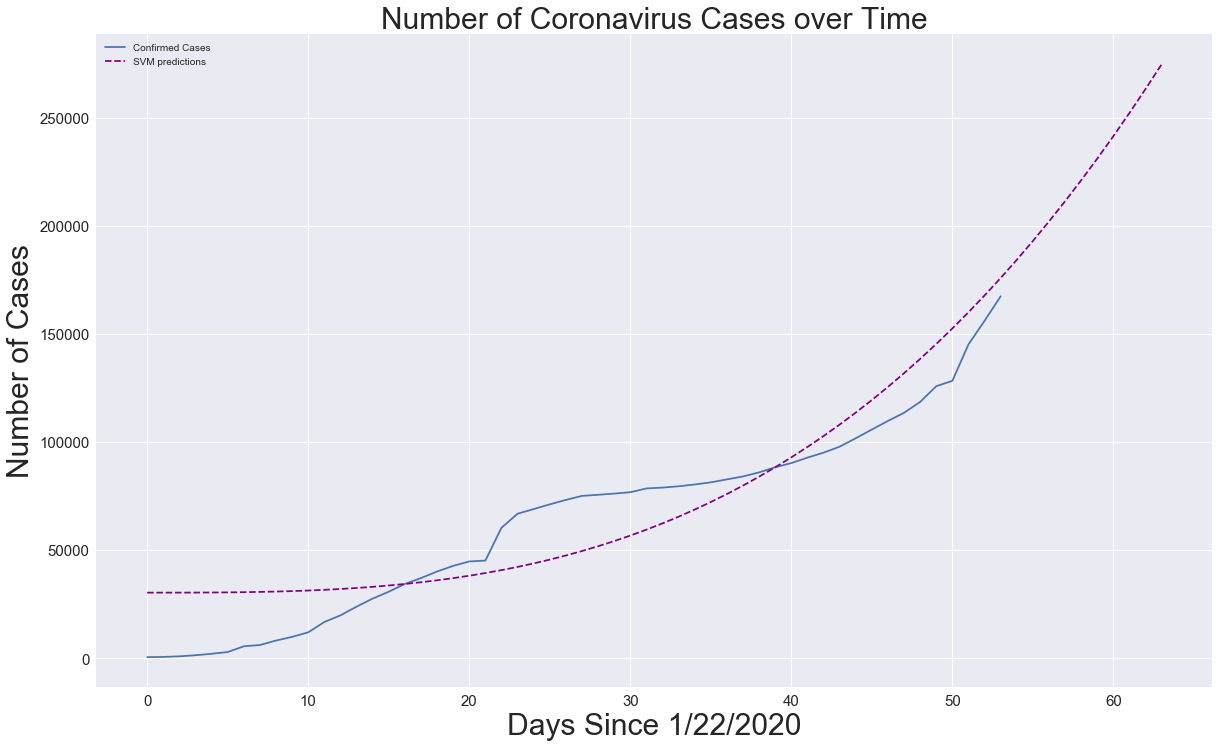

In [45]:
#Confirmed vs Predicted cases

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title("Number of Coronavirus Cases over Time",size=30)
plt.xlabel("Days Since 1/22/2020", size=30)
plt.ylabel("Number of Cases", size=30)
plt.legend(['Confirmed Cases','SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [46]:
#Predictions for the next 10 days using SVM

print('SVM future predictions: ')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions: 


{('03/16/2020', 184302.30684087562),
 ('03/17/2020', 193012.40768487248),
 ('03/18/2020', 202045.06865439066),
 ('03/19/2020', 211406.1544789848),
 ('03/20/2020', 221101.52988820986),
 ('03/21/2020', 231137.05961162096),
 ('03/22/2020', 241518.608378773),
 ('03/23/2020', 252252.04091922112),
 ('03/24/2020', 263343.2219625192),
 ('03/25/2020', 274798.01623822347)}

In [47]:
#Using Linear regression model to make predictions 

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred= linear_model.predict(future_forecast)
print("MAE: ",mean_absolute_error(test_linear_pred,y_test_confirmed))
print("MSE: ",mean_squared_error(test_linear_pred,y_test_confirmed))

MAE:  11965.537037037033
MSE:  307996364.0108404


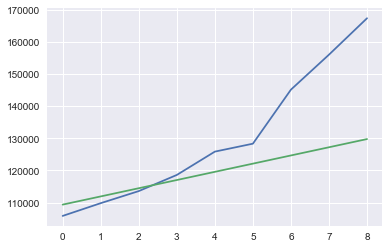

In [48]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)


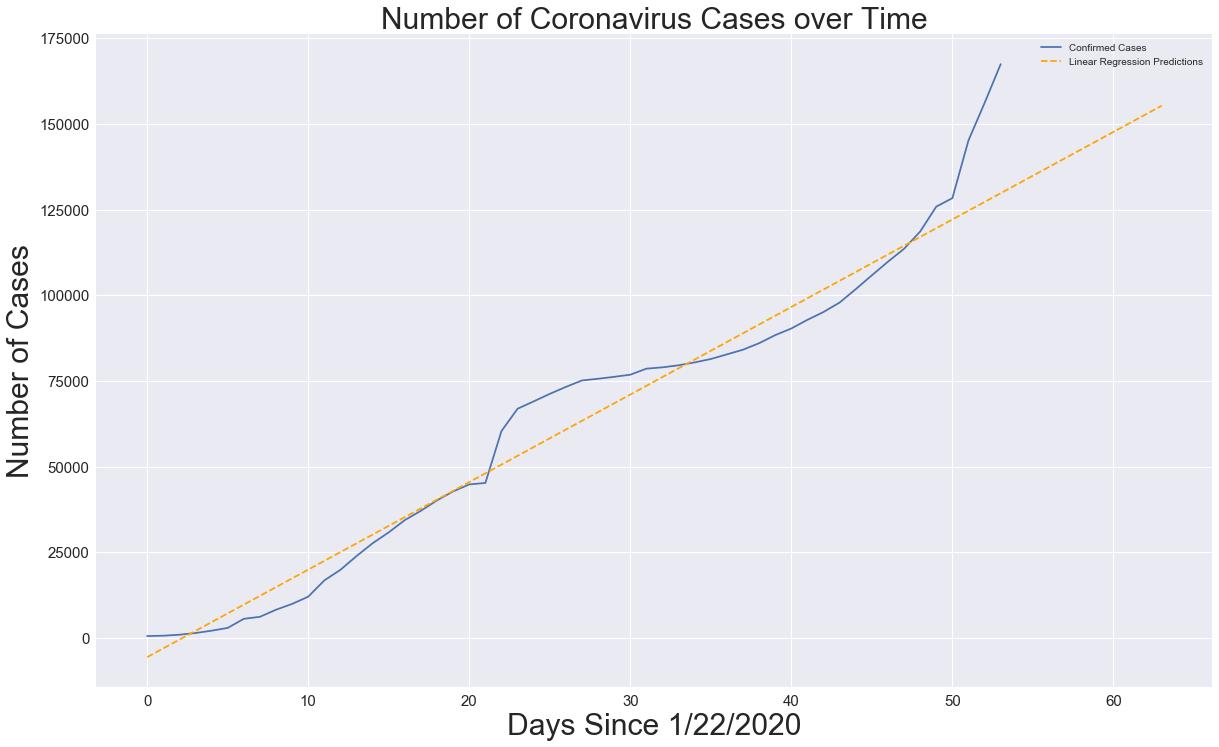

In [49]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title("Number of Coronavirus Cases over Time",size=30)
plt.xlabel("Days Since 1/22/2020", size=30)
plt.ylabel("Number of Cases", size=30)
plt.legend(['Confirmed Cases','Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()